<a href="https://colab.research.google.com/github/abisolami/restuarant_analysis/blob/main/restuarant_rating_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Restuarant Rating Prediction**


The purpose of the project is to build a predictive model (using **Regression Models**) that estimates restuarants ratings based on some relevant feature. The dataset used contains information about the restuarant like
- Restuarant Name
- City
- Currency
- Aggregate rating
- Average cost for two
- Votes
- Cuisines and others

Analyzing the dataset to understand the factors that influence the aggregate rating of restuarants.





---

*This is done by visualizing the relationship between restuarant and attributes like 'Cuisine', 'Cost', and 'Votes'*



**Import Libaries and Read File**

In [119]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from collections import Counter
from google.colab import files

# modelling
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from scipy.stats import skew
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score



In [120]:
# reading the dataset from github
url = "https://raw.githubusercontent.com/abisolami/restuarant_analysis/refs/heads/main/Datasets.csv"
data = pd.read_csv(url)

### **Data Exploration and Preprocessing**

In [121]:
# total number of rows and columns
print(f"The dataset has {data.shape[0]} samples and {data.shape[1]} features")

The dataset has 9551 samples and 21 features


In [122]:
print("\n***************************** Sample Data ******************************\n")
data.head(2)


***************************** Sample Data ******************************



,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591


In [123]:
data.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [124]:
# checking for missing values in each columns
data.isnull().sum()

,0
Restaurant ID,0
Restaurant Name,0
Country Code,0
City,0
Address,0
Locality,0
Locality Verbose,0
Longitude,0
Latitude,0
Cuisines,9


*The **Cuisine** feature seems to have about 9 missing values from the table above*

In [125]:
# Dropping all 9 NaN values
data = data.dropna()
print(f"The dataset now has {data.shape[0]} samples")

The dataset now has 9542 samples


In [126]:
# checking the data types of each features
data.dtypes

,0
Restaurant ID,int64
Restaurant Name,object
Country Code,int64
City,object
Address,object
Locality,object
Locality Verbose,object
Longitude,float64
Latitude,float64
Cuisines,object


**Data type conversion**

In [127]:
# converting the object (yes/no) as boolean
columns_to_boolean = ['Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu']

for item in columns_to_boolean:
  data[item] = data[item].map({'Yes': True, 'No': False})



**Exploring the target variable (Aggregate Rating)**

In [128]:
# data['Aggregate rating'].head(30)
data['Aggregate rating'].value_counts()

,count
Aggregate rating,
0.0,2148
3.2,522
3.1,519
3.4,495
3.3,483
3.5,480
3.0,468
3.6,458
3.7,427


*Visulazing the Aggregate rating*

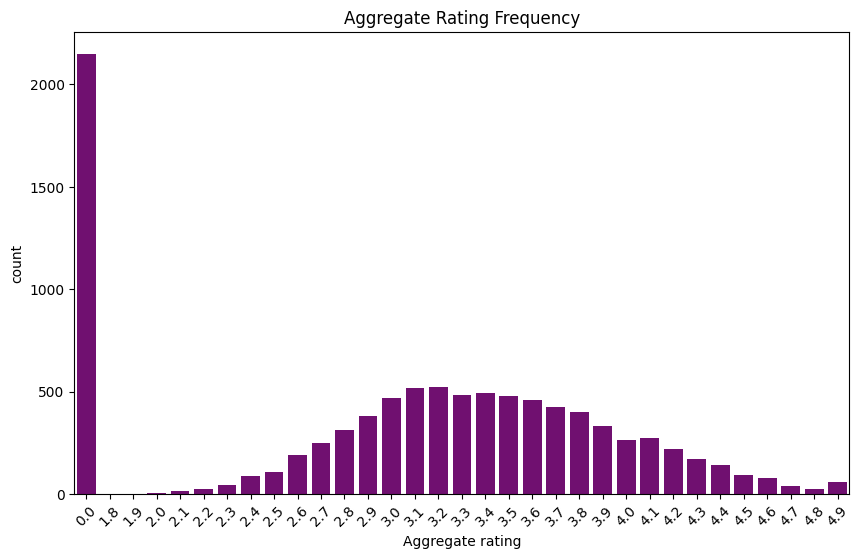

In [129]:
# visualizing the aggregate rating
plt.figure(figsize=(10,6))
sns.countplot(data, x='Aggregate rating', color='purple')
plt.title('Aggregate Rating Frequency')
plt.xticks(rotation=45)
plt.show()


**Observation:** *There is an obvious class imbalance as the highest rating is 0.0 with over 2000 instance and the least being 1.8 rating with only 1 instances*

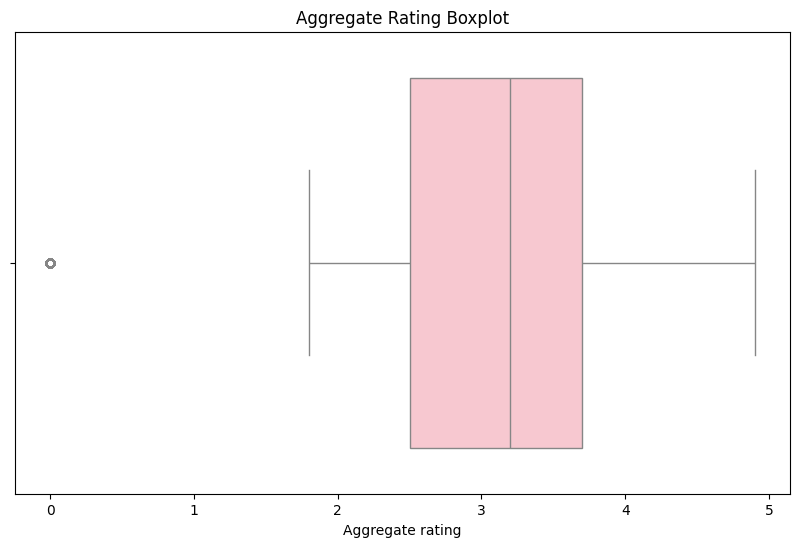

In [130]:
# creating a boxplot for the aggregate rating to detect obvious outliers

plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Aggregate rating', color='pink')
plt.title("Aggregate Rating Boxplot")
plt.show()

Outlier detected in the Aggregate rating for restuarants with 0 rating


### **Descriptive Analysis**

- Calculating the basic statistic measures for numerical data

In [131]:
# filtering the numerical data
numerical_data = []

for columns in data.columns:
  if data[columns].dtypes == 'int64' or data[columns].dtypes == 'float64':
    numerical_data.append(columns)

# removing the restuarants id and country code from the numerical data
numerical_data.remove('Restaurant ID')
numerical_data.remove('Country Code')
numerical_data.remove('Longitude')
numerical_data.remove('Latitude')

numerical_data



# ---------------- OR -----------------------
num_data = data.select_dtypes(include=['int64', 'float64'])
# num_data.head()
# then dropping the unnecessary columns
num_data = num_data.drop(columns=['Restaurant ID', 'Country Code', 'Longitude', 'Latitude'])
num_data.head()


,Average Cost for two,Price range,Aggregate rating,Votes
0,1100,3,4.8,314
1,1200,3,4.5,591
2,4000,4,4.4,270
3,1500,4,4.9,365
4,1500,4,4.8,229


**Visualizing the Numerical Data**



============================== Average Cost for two ============================
Skewness: 35.455688782841825



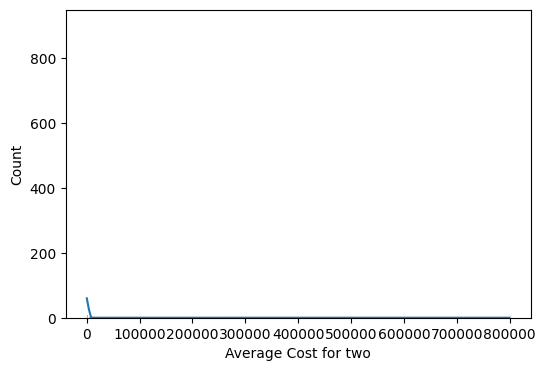



============================== Price range ============================
Skewness: 0.8897388085906884



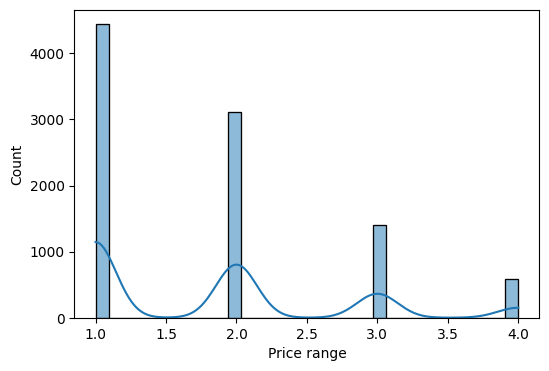



============================== Aggregate rating ============================
Skewness: -0.9529023128493461



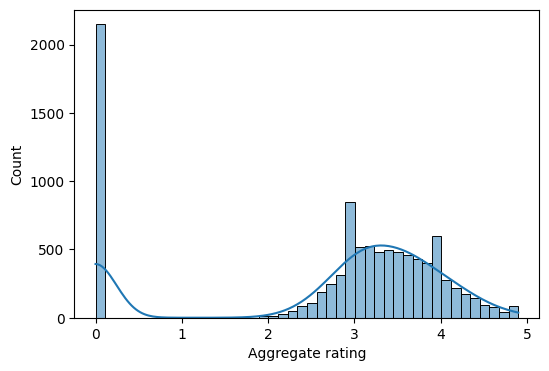



============================== Votes ============================
Skewness: 8.811884592858666



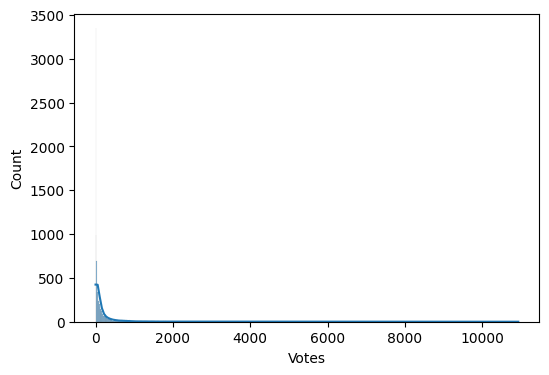

In [132]:
# visualizing the skewness each column in the numerical dataset
for col in num_data:
  print(f"\n\n============================== {col} ============================")
  print(f"Skewness: {skew(num_data[col])}\n")

  plt.figure(figsize=(6, 4))
  sns.histplot(num_data[col], kde=True)
  plt.show()

**Observation:** *Based on the visualization above, columns like: 'Average cost of two', 'votes' are positive skewed and 'Aggregate rating' as negative skewed and 'Price range' as a normal distribution.*

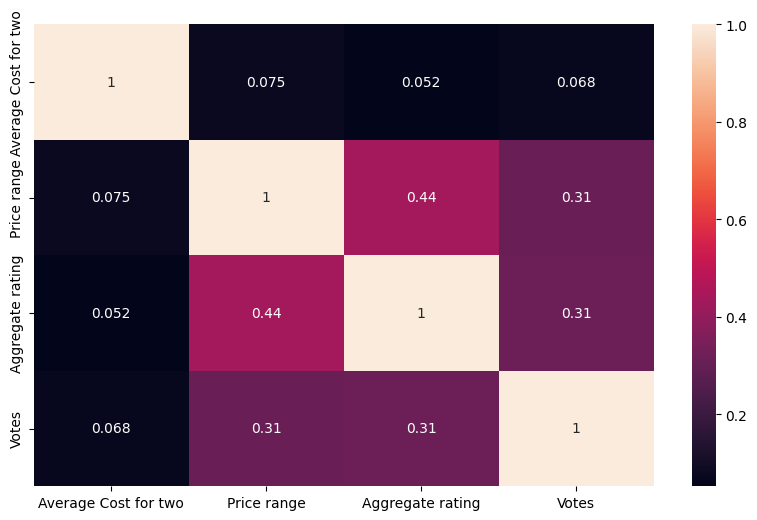

In [133]:
# confirming correlations of the numerical columns
plt.figure(figsize=(10, 6))
sns.heatmap(num_data.corr(), annot=True)
plt.show()

**Observation:** *From the heatmap above, a weak correlation exists with the all the numerical features and the target 'Aggregate rating'*

---

*To solve this.. since the aggregate rating is negatively skewed, we will be transforming the 'Votes' and 'Average cost of 2' using log transformation.*

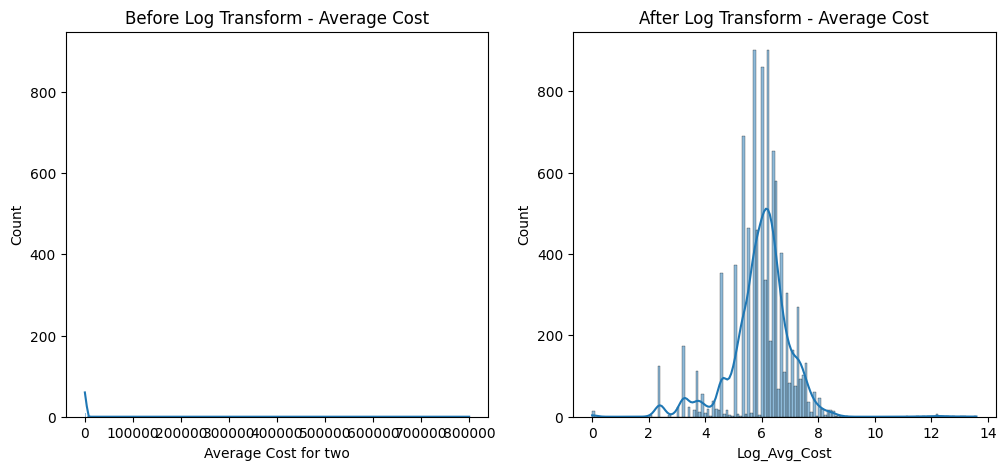

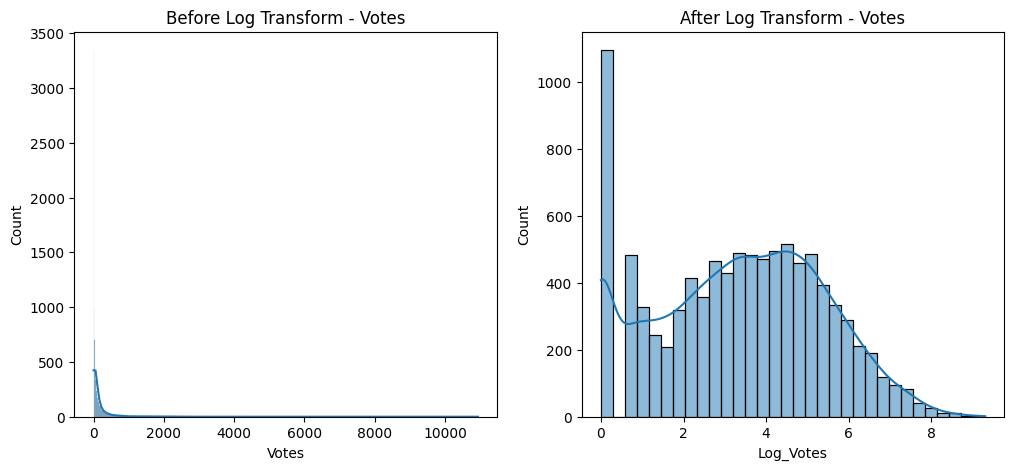

In [135]:
# create new columns so we can compare before and after
data['Log_Avg_Cost'] = np.log1p(data['Average Cost for two'])
data['Log_Votes'] = np.log1p(data['Votes'])

# Average Cost for two
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(data['Average Cost for two'], kde=True)
plt.title('Before Log Transform - Average Cost')

plt.subplot(1,2,2)
sns.histplot(data['Log_Avg_Cost'], kde=True)
plt.title('After Log Transform - Average Cost')
plt.show()

# Votes
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(data['Votes'], kde=True)
plt.title('Before Log Transform - Votes')

plt.subplot(1,2,2)
sns.histplot(data['Log_Votes'], kde=True)
plt.title('After Log Transform - Votes')
plt.show()



*Now that we have performed the log transformation on the postively skewed data, it looks normalized now*

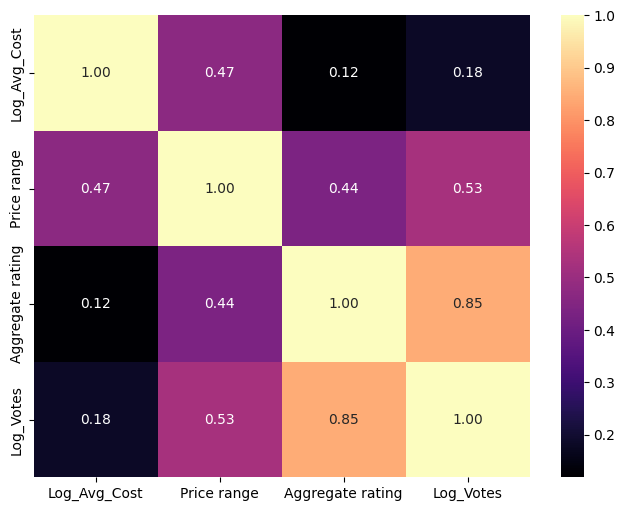

In [136]:
# now visulaizing the correlation once again
corr = data[['Log_Avg_Cost', 'Price range', 'Aggregate rating', 'Log_Votes']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='magma', fmt='.2f')
plt.show()


*There's improvemet in the correlation between the avg cost and the vote  column toward the target, but the price range remained unchanged.*

In [137]:
# now calculating the basic statistics measure for these numerical columns
data[numerical_data].describe()

,Average Cost for two,Price range,Aggregate rating,Votes
count,9542.000000,9542.000000,9542.000000,9542.000000
mean,1200.326137,1.804968,2.665238,156.772060
std,16128.743876,0.905563,1.516588,430.203324
min,0.000000,1.000000,0.000000,0.000000
25%,250.000000,1.000000,2.500000,5.000000
50%,400.000000,2.000000,3.200000,31.000000
75%,700.000000,2.000000,3.700000,130.000000
max,800000.000000,4.000000,4.900000,10934.000000


In [138]:
for column in numerical_data:
  print(f"{column}")
  print("---------------------")
  print(f"Mean is about {round(data[column].mean(), 2)}")
  print(f"The median is about {round(data[column].median(), 2)}")
  print(f"While the Standard Deviation is roughly aruound {round(data[column].std(), 2)}\n")


Average Cost for two
---------------------
Mean is about 1200.33
The median is about 400.0
While the Standard Deviation is roughly aruound 16128.74

Price range
---------------------
Mean is about 1.8
The median is about 2.0
While the Standard Deviation is roughly aruound 0.91

Aggregate rating
---------------------
Mean is about 2.67
The median is about 3.2
While the Standard Deviation is roughly aruound 1.52

Votes
---------------------
Mean is about 156.77
The median is about 31.0
While the Standard Deviation is roughly aruound 430.2



- Exploring other catergories distribution

In [139]:
# categorical_data = []

# for columns in data.columns:
#   if data[columns].dtypes == 'object':
#     categorical_data.append(columns)

# categorical_data

# or

cat_data = data.select_dtypes('object')

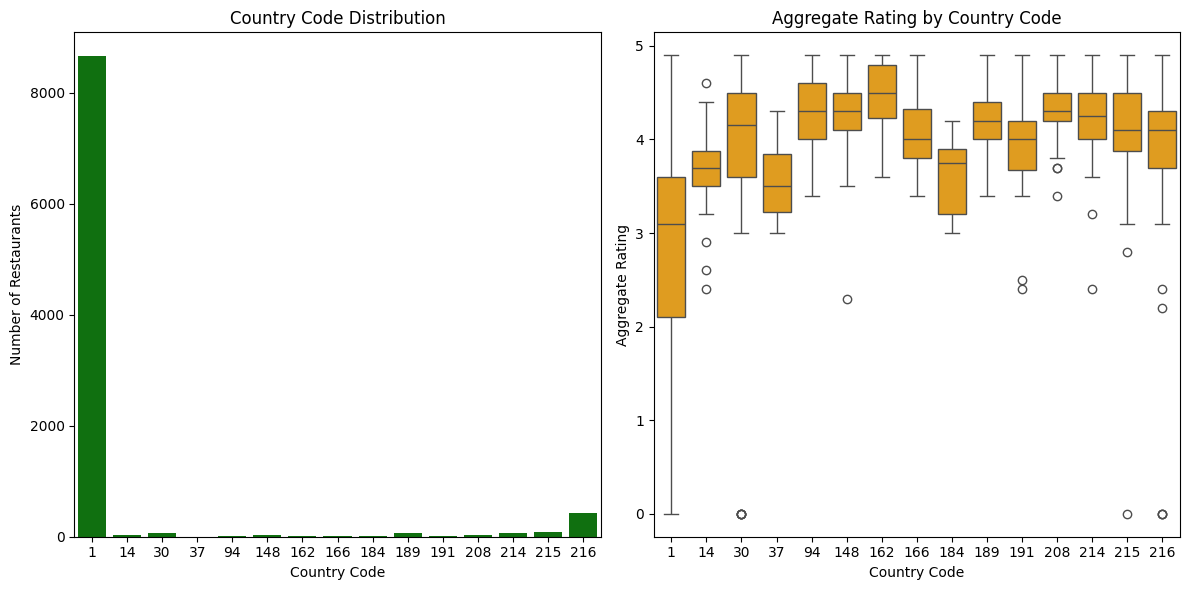

In [140]:
# Visualizing the country code distributin and a boxplot by the side
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(data=data, x='Country Code', color='green')
plt.title("Country Code Distribution")
plt.xlabel("Country Code")
plt.ylabel("Number of Restaurants")

plt.subplot(1, 2, 2)
sns.boxplot(data=data, x='Country Code', y='Aggregate rating', color='orange')
plt.title("Aggregate Rating by Country Code")
plt.xlabel("Country Code")
plt.ylabel("Aggregate Rating")

plt.tight_layout()
plt.show()

*Postive skewness (right skewed) but might be irrelevant due to the column relevance*

*From the visualization  above, country code '1' had most restaurants in the dataset*

In [141]:
# City
print(f"There are {data['Country Code'].nunique()} Countries mentioned and about {data['City'].nunique()} Citites")
# print(f"\n...and top cities with the highest number of restaurants is {data['City'].value_counts().idxmax()}")

There are 15 Countries mentioned and about 140 Citites


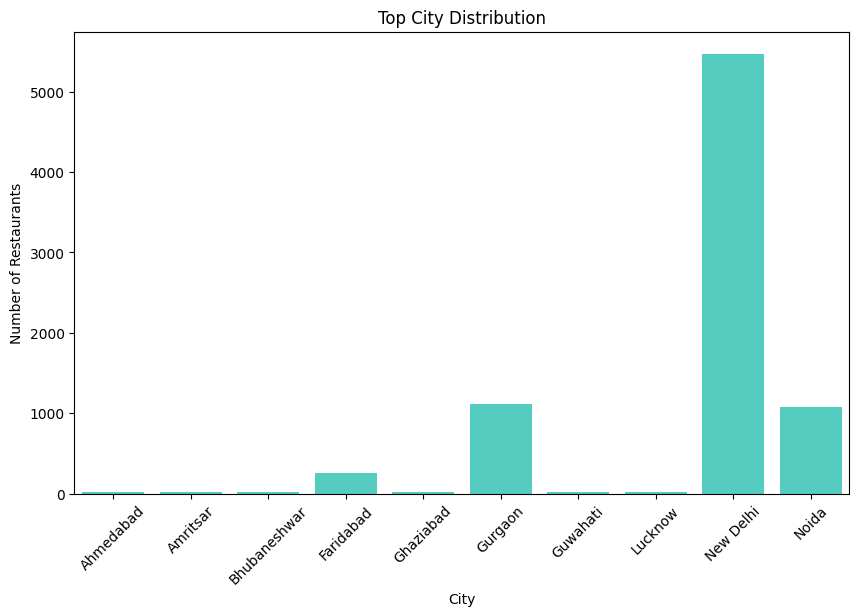

In [142]:
# the visualization of the top city distribution
# because there are so many cities

top_cities = data['City'].value_counts().head(10).index #top 10
top_cities_data = data['City'].isin(top_cities)

plt.figure(figsize=(10, 6))
sns.countplot(data=data[top_cities_data], x='City', color='turquoise')
plt.xticks(rotation=45)
plt.title("Top City Distribution")
plt.ylabel("Number of Restaurants")
plt.show()

*Based on the Visualization above, the city with the highest number of restaurants is New Delhi*

In [143]:
# Restuarant Name
unique_restaurants = data['Restaurant Name'].nunique()
print(f"So out of {data.shape[0]} total instances, there are only about {unique_restaurants} distinct restuarants")

So out of 9542 total instances, there are only about 7437 distinct restuarants


Feature **Cusines** contains list of meals. To get each item in the list, it is necessary to *Explode* the feature


In [144]:
# breaking it down--- counting the actually unique cuisine

# converting each row in the cuisine to a list
list_of_cuisines = data['Cuisines'].apply(lambda x: [cusine.strip() for cusine in x.split(",")])
# list_of_cuisines

# # counting each item in list on the Cuisine column
every_cuisine = [cuisine for each_list in list_of_cuisines for cuisine in each_list]
cuisine_count = Counter(every_cuisine)

# converting back to df and arranging in descending order
cuisine_df = pd.DataFrame(list(cuisine_count.items()), columns=['Cuisine', 'Count'])
cuisine_df = cuisine_df.sort_values(by='Count', ascending=False)
print(f"Now, there are {cuisine_df.shape[0]} unique cuisines")

# cuisine_df.head()

# or

top_cuisines = data['Cuisines'].str.split(', ').explode().value_counts()
top_cuisines

Now, there are 145 unique cuisines


,count
Cuisines,
North Indian,3960
Chinese,2735
Fast Food,1986
Mughlai,995
Italian,764
...,...
Cuisine Varies,1
Fish and Chips,1
Durban,1


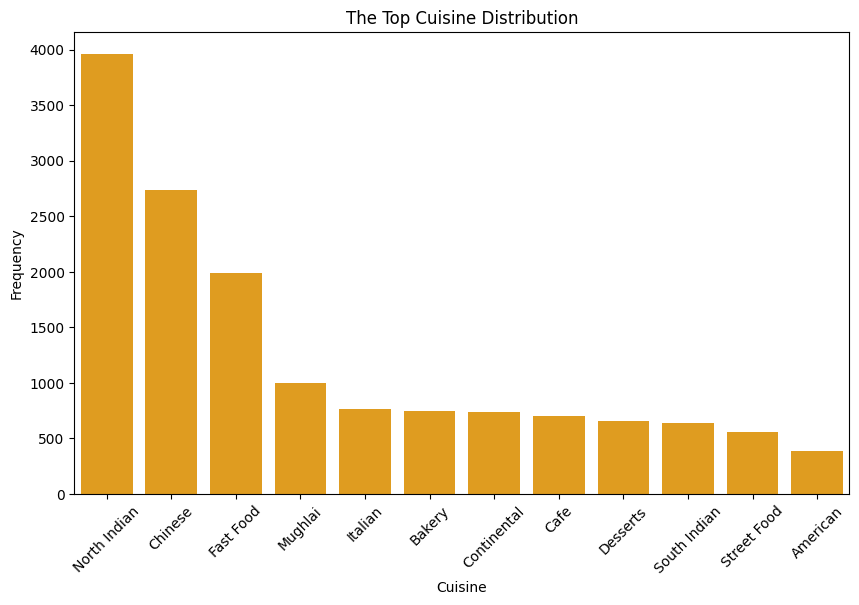

In [145]:
# visualizing the top cuisines
top_cuisines = cuisine_df.head(12)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_cuisines, x='Cuisine', y='Count', color='orange')
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.title("The Top Cuisine Distribution")
plt.show()

*From the bar chart above, North Indiana and Chinese clearly  is the top cuisine in the dataset*

In [146]:
# The rating text and color count
data[['Rating text', 'Rating color']].value_counts()

# alternatively...
# use group by
data.groupby(['Rating text', 'Rating color']).size()

,,0
Rating text,Rating color,
Average,Orange,3734
Excellent,Dark Green,300
Good,Yellow,2096
Not rated,White,2148
Poor,Red,186
Very Good,Green,1078


### **Geospatial Analysis**

- Visualizing location of the restaurants

<Figure size 1000x600 with 0 Axes>

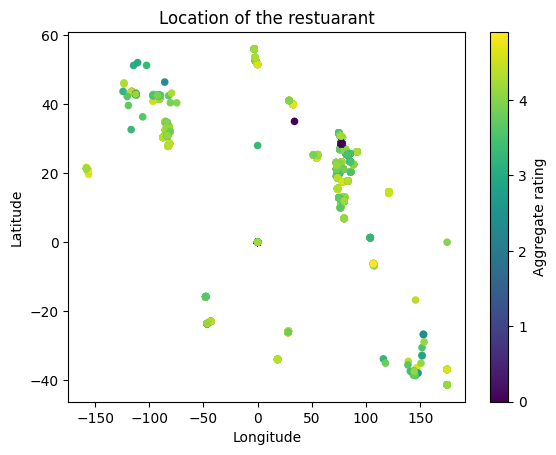

In [147]:
# visualization of restaurants location using longitude and latitude

location = data[['Latitude', 'Longitude']]

plt.figure(figsize=(10, 6))
# plt.scatter(data['Longitude'], data['Latitude'], alpha=0.5)
data.plot(x='Longitude', y='Latitude', c='Aggregate rating', kind='scatter')

plt.title("Location of the restuarant")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.show()


In [148]:
# mapping
fig = px.scatter_mapbox(data,
                        lon='Longitude',
                        lat='Latitude',
                        zoom = 3,
                        color='Aggregate rating',
                        title= ('Mapping Restuarants')
                        )
fig.update_layout(mapbox_style = 'open-street-map')
fig.update_layout(margin = {'r':0, 't':50, 'l':0, 'b':10})
fig.show()


# fig.show()

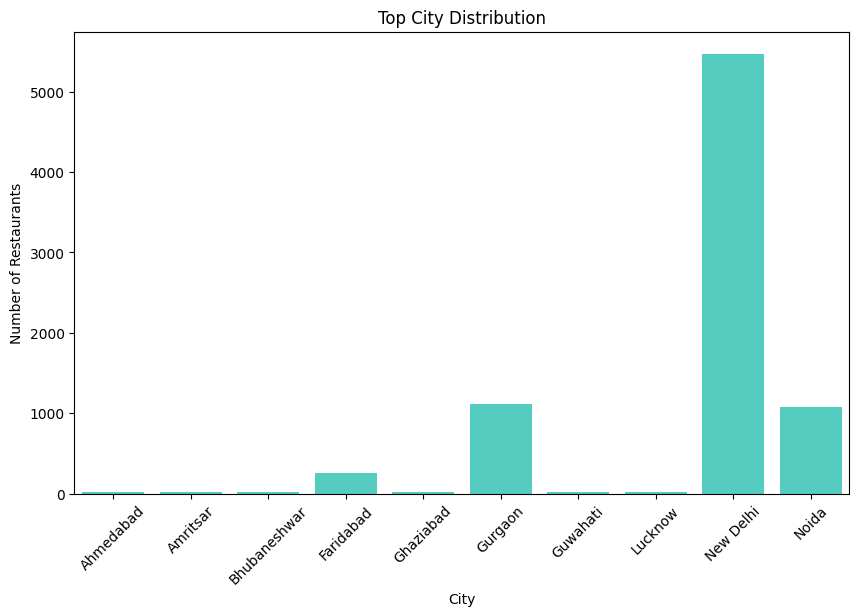

In [149]:
#  Restaurants-city distribution
top_cities = data['City'].value_counts().head(10).index #top 10
top_cities_data = data['City'].isin(top_cities)

plt.figure(figsize=(10, 6))
sns.countplot(data=data[top_cities_data], x='City', color='turquoise')
plt.xticks(rotation=45)
plt.title("Top City Distribution")
plt.ylabel("Number of Restaurants")
plt.show()

## **LEVEL 2**


### **Table Booking and Online Delivery**

- % of available table booking and online delivery

In [150]:
# percentage of available table booking
total_restaurants = data.shape[0]
available_table_booking = data[data['Has Table booking'] == True]
percent_table_booking = (len(available_table_booking)/total_restaurants) * 100

print(f"Only {len(available_table_booking)} restaurants allow table booking which is about {round(percent_table_booking, 2)}%")

Only 1158 restaurants allow table booking which is about 12.14%


In [151]:
# percentage available online delivery
online_delivery = data[data['Has Online delivery'] == True]
# percentage calculation
online_delivery_percent = (len(online_delivery)/total_restaurants) * 100

print(f"Percentage of restaurants with online delivery service: {round(online_delivery_percent, 2)}%")

Percentage of restaurants with online delivery service: 25.69%


- Comparing difference in rating of restaurant with table booking to those without

In [152]:
# average rating of restaurants with available table booking
table_booking_rating = available_table_booking['Aggregate rating'].mean()
average_rating_table_booking = round(float(table_booking_rating), 2)

print(f"Average rating of restaurants with table booking is {average_rating_table_booking}/5.0\n")

# rating of restaurants without table booking
no_table_booking = data[data['Has Table booking'] == False]
no_table_booking_rating = no_table_booking['Aggregate rating'].mean()
average_rating_no_table_booking = round(float(no_table_booking_rating), 2)

print(f"About {len(no_table_booking)} restaurants don't allow table booking resulting to their average rating as {average_rating_no_table_booking}/5.0")

Average rating of restaurants with table booking is 3.44/5.0

About 8384 restaurants don't allow table booking resulting to their average rating as 2.56/5.0


/tmp/ipython-input-944359111.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




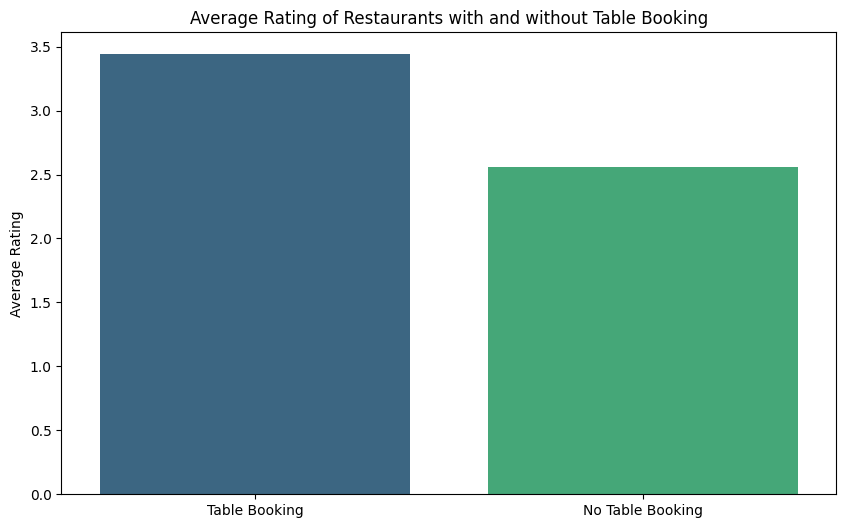

In [153]:
# Visualizing rating of restuarants with tabke booking and those without
plt.figure(figsize=(10, 6))
sns.barplot(x=['Table Booking', 'No Table Booking'], y=[average_rating_table_booking, average_rating_no_table_booking], palette='viridis')
plt.ylabel("Average Rating")
plt.title("Average Rating of Restaurants with and without Table Booking")
plt.show()

*It is observed that the are more restaurant that don't allow table booking yet Restaurants with table reservations have better rating to restaurants without one*

/tmp/ipython-input-1842882780.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




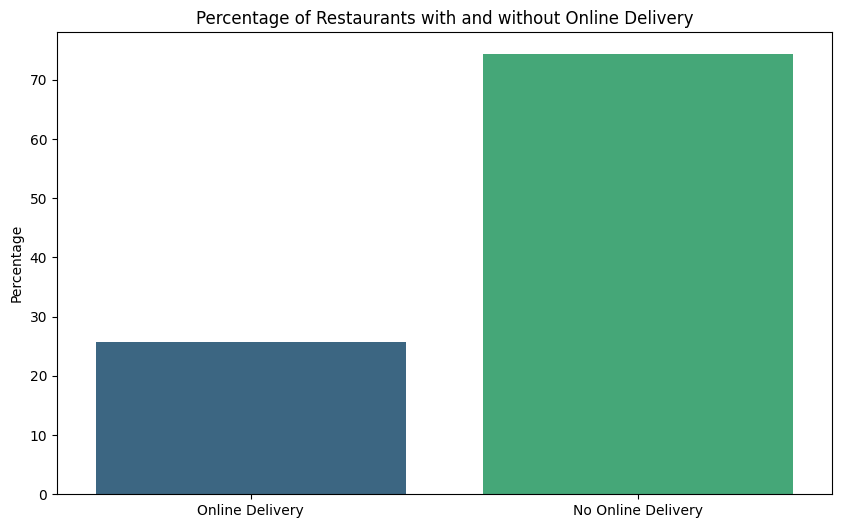

In [154]:
# Visualizing percentage of restuarants with online delivery and those without
plt.figure(figsize=(10, 6))
sns.barplot(x=['Online Delivery', 'No Online Delivery'], y=[online_delivery_percent, 100-online_delivery_percent], palette='viridis')
plt.ylabel("Percentage")
plt.title("Percentage of Restaurants with and without Online Delivery")
plt.show()

CLearly, More Restuarants don't offer Online Delivery

- Availablity of online delivery among restaurants with different price ranges

In [155]:
print(f"There are about {len(online_delivery)} restaurants with avaliable online deliveries")

print("\n\nOut of these restaurants... the price range is: ")
print("-"*50)
online_delivery['Price range'].value_counts()

There are about 2451 restaurants with avaliable online deliveries


Out of these restaurants... the price range is: 
--------------------------------------------------


,count
Price range,
2,1286
1,701
3,411
4,53


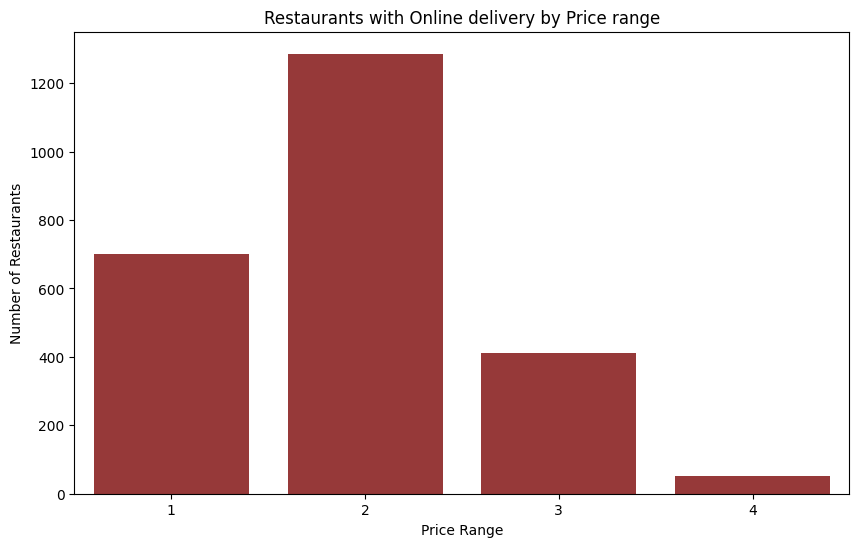

In [156]:
# visualizing
price_range_online_delivery = online_delivery['Price range'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=price_range_online_delivery.index, y=price_range_online_delivery.values, color='brown')
plt.xlabel("Price Range")
plt.ylabel("Number of Restaurants")
plt.title("Restaurants with Online delivery by Price range")
plt.show()

*Out of over 2000 restaurants offering online delivery, only the price range of '2' had over a thousand count and '4' having the least as 53*

### **Price Range Analysis**

- Determine most common price range

In [157]:
# most common price
print(data['Price range'].value_counts())

common_price = data['Price range'].value_counts().idxmax()

print(f"\n\nThe most common price range among all the restaurants is {str(common_price)}")

Price range
1    4438
2    3113
3    1405
4     586
Name: count, dtype: int64


The most common price range among all the restaurants is 1


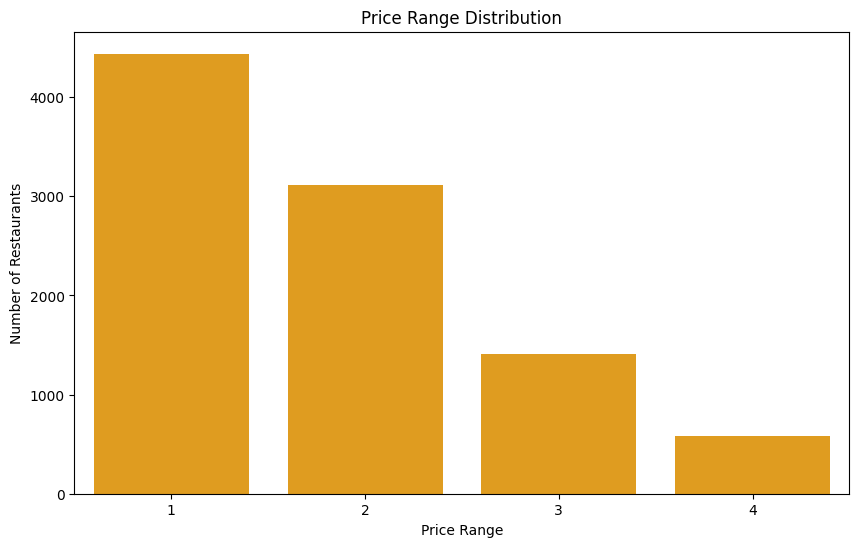

In [158]:
# visualizing
price_range = data['Price range'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=price_range.index, y=price_range.values, color='orange')
plt.xlabel("Price Range")
plt.ylabel("Number of Restaurants")
plt.title("Price Range Distribution")
plt.show()

*The bar plot above displays '1' as the common price range overall with over 4000 restarants*

- Average rating of each price range

In [159]:
for price in data['Price range'].unique():
  each_price_range = data[data['Price range'] == price]
  # mean of each price
  average_rating_price_range = each_price_range['Aggregate rating'].mean()

  print(f"\nThe average rating for {price} is {round(average_rating_price_range, 2)}")



The average rating for 3 is 3.68

The average rating for 4 is 3.82

The average rating for 2 is 2.94

The average rating for 1 is 2.0


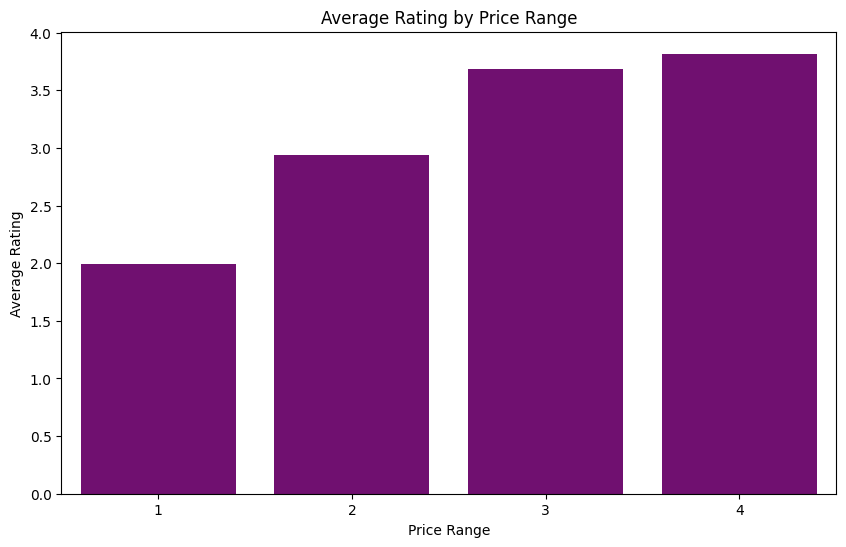

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

In [160]:
# visualizing
price_range_rating = data.groupby('Price range')['Aggregate rating'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=price_range_rating.index, y=price_range_rating.values, color='purple')
plt.xlabel("Price Range")
plt.ylabel("Average Rating")
plt.title("Average Rating by Price Range")
plt.show()
plt

- Color of highest rating through all prices

*Since the highest average rating is  price range '4' with an average rating of 3.82*

In [161]:
data.groupby('Price range')['Rating color'].value_counts().reset_index()


,Price range,Rating color,count
0,1,Orange,1895
1,1,White,1700
2,1,Yellow,606
3,1,Green,144
4,1,Red,62
5,1,Dark Green,31
6,2,Orange,1425
7,2,Yellow,794
8,2,White,402
9,2,Green,325


### **Feature Engineering**

- Feature extraction


In [162]:
# new column that calculates the length of the restaurants
data['Restaurant length'] = data['Restaurant Name'].str.len()
data.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Log_Avg_Cost,Log_Votes,Restaurant length
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,False,False,3,4.8,Dark Green,Excellent,314,7.003974,5.752573,16
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,False,False,3,4.5,Dark Green,Excellent,591,7.090910,6.383507,16
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,False,False,4,4.4,Green,Very Good,270,8.294300,5.602119,22


- Create a new feature


In [163]:
# new feature that states true or false if other past client recommend the restuarant

# using list comprehension
data['Recommendation'] = [True if rating >= 3.0 else False for rating in data['Aggregate rating']]
# data.head(-30)

data[['Aggregate rating', 'Recommendation']]


,Aggregate rating,Recommendation
0,4.8,True
1,4.5,True
2,4.4,True
3,4.9,True
4,4.8,True
...,...,...
9546,4.1,True
9547,4.2,True
9548,3.7,True
9549,4.0,True


## **LEVEL 3**

### **Predictive Modeling**

- Build regression model


In [164]:
# deriving the dataframe
columns_to_drop = ['Restaurant ID', 'Restaurant Name', 'Address', 'Locality',
                   'Longitude', 'Latitude', 'Locality Verbose', 'Rating color',
                   'Rating text', 'Recommendation', 'Restaurant length',
                   'Country Code', 'Currency', 'Cuisines', 'City', 'Switch to order menu', 'Votes', 'Average Cost for two']

train_df = data.drop(columns=columns_to_drop, axis=1)
print(f"The new dataframe now has {train_df.shape[0]} rows and {train_df.shape[1]} columns")
print(f"\n------------------------------------ SAMPLE DATA -------------------------")
train_df.head()

The new dataframe now has 9542 rows and 7 columns

------------------------------------ SAMPLE DATA -------------------------


,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Log_Avg_Cost,Log_Votes
0,True,False,False,3,4.8,7.003974,5.752573
1,True,False,False,3,4.5,7.090910,6.383507
2,True,False,False,4,4.4,8.294300,5.602119
3,False,False,False,4,4.9,7.313887,5.902633
4,True,False,False,4,4.8,7.313887,5.438079


In [165]:
# encoding the boolen data
train_df['Has Table booking'] = pd.get_dummies(data['Has Table booking'], drop_first=True, dtype=float)
train_df['Has Online delivery'] = pd.get_dummies(data['Has Online delivery'], drop_first=True, dtype=float)
train_df['Is delivering now'] = pd.get_dummies(data['Is delivering now'], drop_first=True, dtype=float)

In [166]:
# Defining the dependent and independent variable
# the independent variable will be everything in the new DF aside the targe
X = train_df.drop('Aggregate rating', axis=1)
y = train_df['Aggregate rating']

In [167]:
X.head(3)

,Has Table booking,Has Online delivery,Is delivering now,Price range,Log_Avg_Cost,Log_Votes
0,1.0,0.0,0.0,3,7.003974,5.752573
1,1.0,0.0,0.0,3,7.090910,6.383507
2,1.0,0.0,0.0,4,8.294300,5.602119


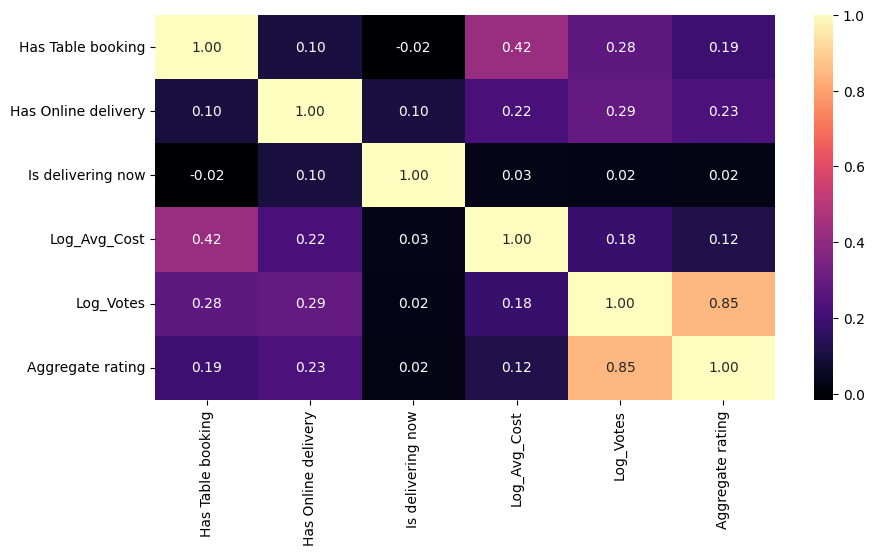

In [168]:
# confirming no data leakage
corr_values = data[['Has Table booking', 'Has Online delivery', 'Is delivering now', 'Log_Avg_Cost',	'Log_Votes', 'Aggregate rating']].corr()
# print(corr_values)

# visualize
plt.figure(figsize=(10, 5))
sns.heatmap(corr_values, annot=True, cmap='magma', fmt='.2f')
plt.show()

Converting the categorical data to numerical data

In [169]:
# converting the other categorical data to numerical data
# using one hot encoding
# cat_data = ['City', 'Cuisines', 'Currency']


# preprocess = ColumnTransformer(
#     transformers=[
#         ("categorical", OneHotEncoder(handle_unknown='ignore'), cat_data),
#         # ("numerical", StandardScaler(), ['Average Cost for two', 'Votes', 'Price range', 'Country Code'])
#     ],
#     remainder='passthrough' #to keep the other numeric and binary columns
# )


*Now all the filtered categorical data are now in numerical format which can now be understandable to the model*

**Linear Regression**

In [170]:
# using a pipline to train the model

clf = Pipeline([
    ("linReg", LinearRegression())
])

# splitting the data 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


In [171]:
# evaluating performance of the linear regression model

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"RMSE: {np.sqrt(mse)}")

Mean Squared Error: 0.6360581133977781
R-squared: 0.7222492709572614
RMSE: 0.797532515573991


**Random Forest**

In [172]:
clf = Pipeline([
    ("randomForest", RandomForestRegressor())
])

clf.fit(X_train, y_train
        )

y_pred = clf.predict(X_test)


In [173]:

# evaluating the random Forest model
rand_forest_mse = mean_squared_error(y_test, y_pred)
rand_forest_r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {rand_forest_mse}")
# use rmse instead and accuracy and check skewness
# r or l skewness
# boxplot to check outliers
print(f"R-squared: {rand_forest_r2}")
print(f"RMSE: {np.sqrt(rand_forest_mse)}")

Mean Squared Error: 0.1288889484712935
R-squared: 0.9437174078132295
RMSE: 0.3590110701236015


*Random forest is performing better than the linear regression meaning it is catching the non-linear relationshi in that data*


**Decision Tree Regressor**

In [174]:
#training the model
clf = Pipeline([
    ("decision-tree", DecisionTreeRegressor())
])

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [175]:
# evaluating the decision tree regressor
dt_mse = mean_squared_error(y_test, y_pred)
dt_r2 = r2_score(y_test, y_pred)

print(f"Mean Squred Error of the Decision Tree: {dt_mse}")
print(f"R2 score of the Decision Tree: {dt_r2}")
print(f"RMSE of the Decision Tree: {np.sqrt(dt_mse)}")

Mean Squred Error of the Decision Tree: 0.19726241130223549
R2 score of the Decision Tree: 0.9138604203014701
RMSE of the Decision Tree: 0.44414233225649125


Overall, the Random Forest Regressor performed better

**XGBoost Regressor**

In [185]:
# training the model
clf = Pipeline([
    ("xgboost", XGBRegressor(n_estimators=200, random_state=42))
])

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [186]:
# testing xgboost
xgb_mse = mean_squared_error(y_test, y_pred)
xgb_r2 = r2_score(y_test, y_pred)
xgb_rmse = np.sqrt(xgb_mse)

print(f"Mean Squared Error of the XGBoost: {xgb_mse}")
print(f"R2 score of the XGBoost: {xgb_r2}")
print(f"RMSE of the XGBoost: {xgb_rmse}")

Mean Squared Error of the XGBoost: 0.12795127741574144
R2 score of the XGBoost: 0.9441268653986231
RMSE of the XGBoost: 0.35770277803749506


**XGBoost**  performed slightly better than **Random Forest**

### **Customer Preference Analysis**

- Analyzing the types of cuisine and rating

*Now that we have gotten the total number of unique cuisine in the list of each cuisine as 145, we can go on*

In [178]:
# creating a list that stores the each cusine and their rating
cuisine_rating = []
for cuisine in cuisine_count.keys():
  cuisine_rating.append([cuisine, round(data[data['Cuisines'].str.contains(cuisine)]['Aggregate rating'].mean(), 2)])

cuisine_rating
cuisine_rating_df = pd.DataFrame(cuisine_rating, columns=['Cuisine', 'Average Rating'])

/tmp/ipython-input-3121156933.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




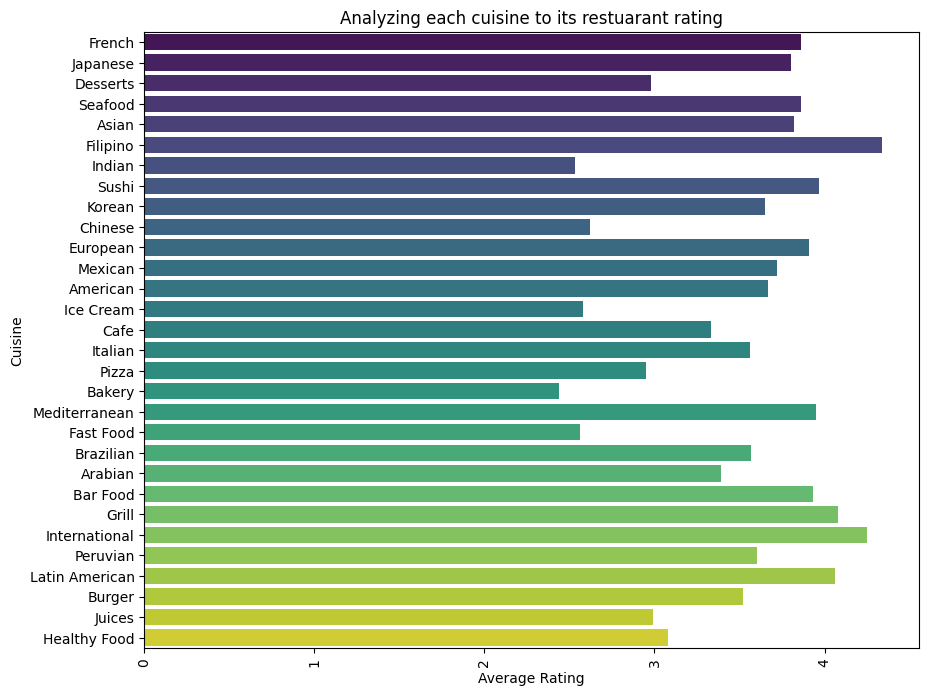

In [179]:
# plotting a bar chart
# filtering the df to the first 30 on the list
cuisine_rating = cuisine_rating_df.head(30)

plt.figure(figsize=(10, 8))
sns.barplot(data=cuisine_rating, orient='h', x='Average Rating', y='Cuisine', palette='viridis')
plt.xticks(rotation=90)
plt.ylabel("Cuisine")
plt.xlabel("Average Rating")
plt.title("Analyzing each cuisine to its restuarant rating")
plt.show()


- Most popular cuisines based on vote

/tmp/ipython-input-3186894788.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0, 0.5, 'Total Votes')

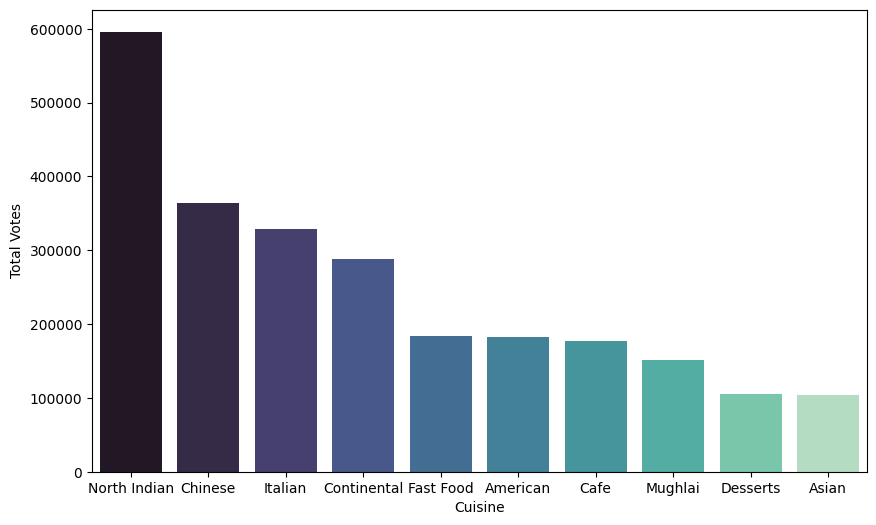

In [180]:
# plotting the most popular cuisne based on number of votes
cuisine_votes = Counter()

for i, row in data.iterrows():
    for cuisine in row['Cuisines'].split(","):
        cuisine_votes[cuisine.strip()] += row['Votes']

cuisine_votes_df = pd.DataFrame(list(cuisine_votes.items()), columns=['Cuisine', 'Vote'])
cuisine_votes_df = cuisine_votes_df.sort_values(by='Vote', ascending=False)

# uisine_votes_df.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=cuisine_votes_df.head(10), x='Cuisine', y='Vote', palette='mako')
plt.xlabel("Cuisine")
plt.ylabel("Total Votes")

*North Indiana still remains the most popular cuisine even by votes*

- Any specific cuisines that tend to receive higher ratings

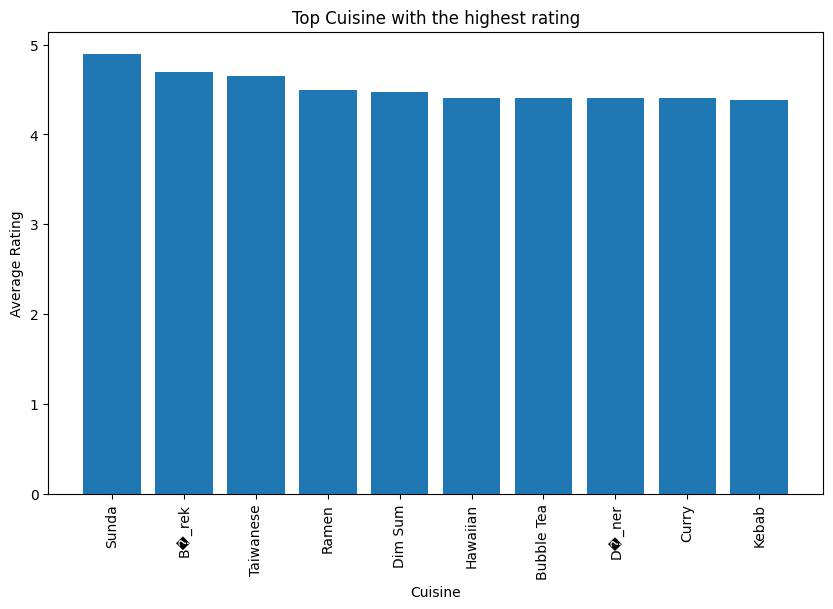

In [181]:
# high rating cuisine
top_cuisine = cuisine_rating_df.sort_values(by='Average Rating', ascending=False).head(10)
top_cuisine


# visualizing
plt.figure(figsize=(10, 6))
plt.bar(top_cuisine['Cuisine'], top_cuisine['Average Rating'])
plt.xlabel("Cuisine")
plt.ylabel("Average Rating")
plt.xticks(rotation=90)
plt.title("Top Cuisine with the highest rating")
plt.show()

### **Other Visualization**


- distribution of averating rating

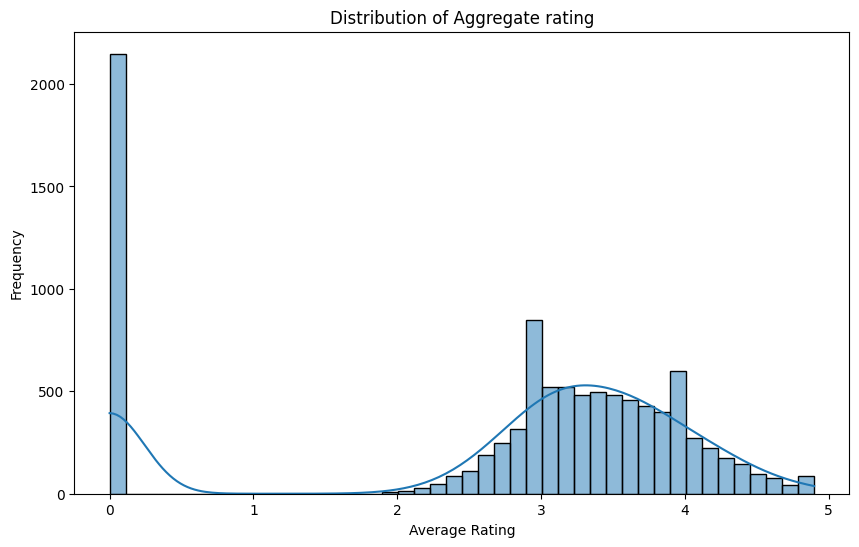

/tmp/ipython-input-3991894397.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




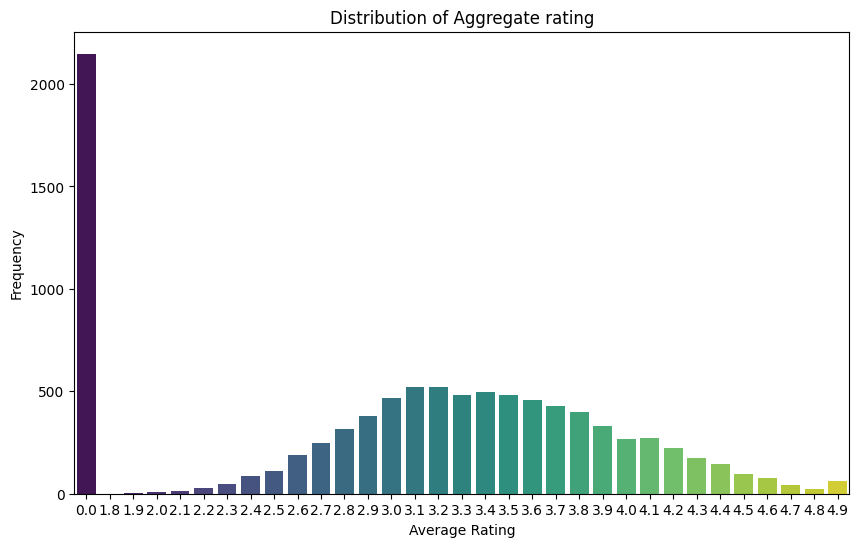

In [182]:
# histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Aggregate rating', kde=True)
plt.xlabel("Average Rating")
plt.ylabel("Frequency")
plt.title("Distribution of Aggregate rating")
plt.show()

# countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Aggregate rating', palette='viridis')
plt.xlabel("Average Rating")
plt.ylabel("Frequency")
plt.title("Distribution of Aggregate rating")
plt.show()

- Comparing the average rating of different cuisines/cities

/tmp/ipython-input-1841996364.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




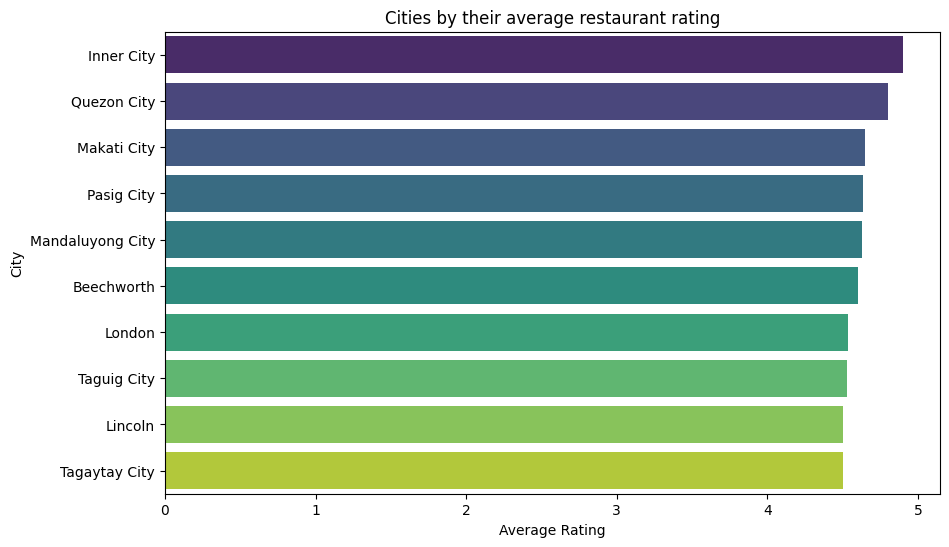

In [183]:
#plotting average rating of differnt cities rating
city_rating = data.groupby('City')['Aggregate rating'].mean()
city_rating = city_rating.sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=city_rating.values, y=city_rating.index, palette="viridis")
plt.title("Cities by their average restaurant rating")
plt.xlabel("Average Rating")
plt.ylabel("City")
plt.show()


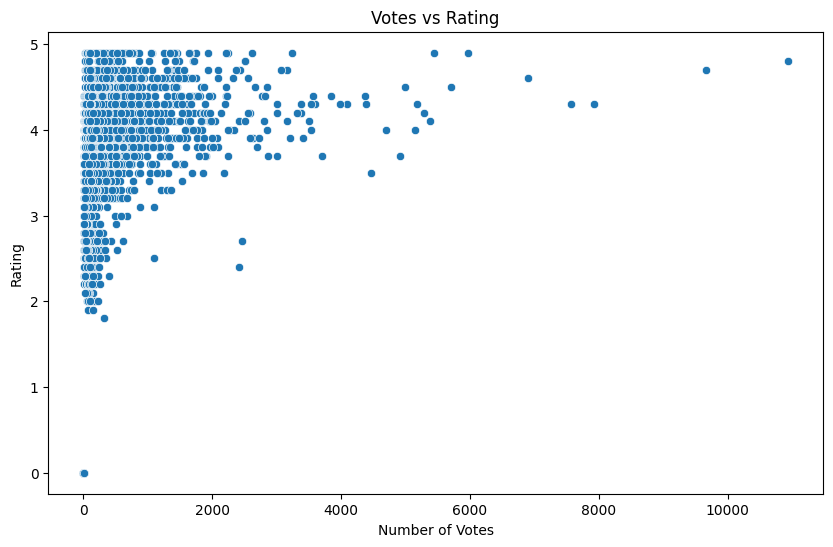

In [184]:
# relationship between various features and target variable

# using votes as the feature and rating as the target
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Votes', y='Aggregate rating', data=data)
plt.title("Votes vs Rating")
plt.xlabel("Number of Votes")
plt.ylabel("Rating")
plt.show()